In [61]:
# Final Project Scratch

# Packages
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from itertools import product

In [62]:
music = pd.read_csv('music.csv')

In [63]:
music.head()
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [64]:
# Remove columns ID and Name

music = music.drop('id', 1)
music = music.drop('name', 1)

In [65]:
music.head()
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   instrumentalness  174389 non-null  float64
 7   key               174389 non-null  int64  
 8   liveness          174389 non-null  float64
 9   loudness          174389 non-null  float64
 10  mode              174389 non-null  int64  
 11  popularity        174389 non-null  int64  
 12  release_date      174389 non-null  object 
 13  speechiness       174389 non-null  float64
 14  tempo             174389 non-null  float64
 15  valence           174389 non-null  float64
 16  year              17

In [66]:
# Decades Variable

#music.loc[1,1]
#len(music)
music['year'][1201] >= 1930
music.year[1201] >= 1930

music['decade'] = 1

In [67]:
music.head()
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   instrumentalness  174389 non-null  float64
 7   key               174389 non-null  int64  
 8   liveness          174389 non-null  float64
 9   loudness          174389 non-null  float64
 10  mode              174389 non-null  int64  
 11  popularity        174389 non-null  int64  
 12  release_date      174389 non-null  object 
 13  speechiness       174389 non-null  float64
 14  tempo             174389 non-null  float64
 15  valence           174389 non-null  float64
 16  year              17

In [68]:
for i in range(len(music)):
    if (music.year[i] >= 1920) & (music.year[i] < 1930):
        music['decade'][i] = 1920
    elif (music.year[i] >= 1930) & (music.year[i] < 1940):
        music['decade'][i] = 1930
    elif (music.year[i] >= 1940) & (music.year[i] < 1950):
        music['decade'][i] = 1940
    elif (music.year[i] >= 1950) & (music.year[i] < 1960):
        music['decade'][i] = 1950
    elif (music.year[i] >= 1960) & (music.year[i] < 1970):
        music['decade'][i] = 1960
    elif (music.year[i] >= 1970) & (music.year[i] < 1980):
        music['decade'][i] = 1970
    elif (music.year[i] >= 1980) & (music.year[i] < 1990):
        music['decade'][i] = 1980
    elif (music.year[i] >= 1990) & (music.year[i] < 2000):
        music['decade'][i] = 1990
    elif (music.year[i] >= 2000) & (music.year[i] < 2010):
        music['decade'][i] = 2000
    elif (music.year[i] >= 2010) & (music.year[i] < 2020):
        music['decade'][i] = 2010
    else:
        music['decade'][i] = 2020

In [69]:
music[['year', 'decade']]

,year,decade
0,1920,1920
1,1920,1920
2,1920,1920
3,1920,1920
4,1920,1920
...,...,...
174384,2020,2020
174385,2021,2020
174386,2020,2020
174387,2021,2020


2010    22455
1990    20328
1970    20118
1980    20074
1950    20000
1960    19610
1940    15493
2000    13782
1930    10764
2020     6134
1920     5631
Name: decade, dtype: int64

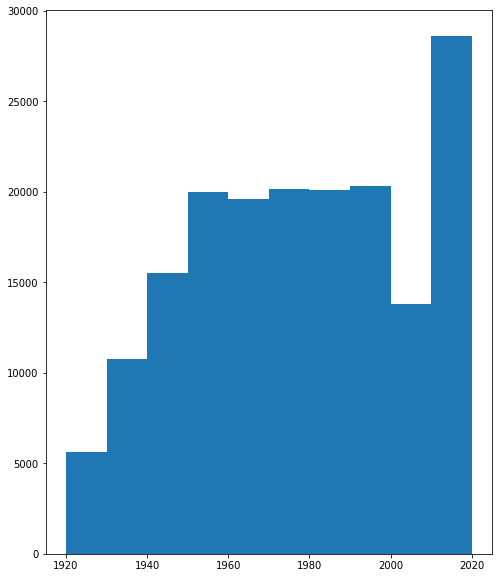

In [70]:
plt.hist(music.decade)
music.decade.value_counts()

2    43768
4    43669
3    43134
1    42737
0     1081
Name: tempo_disc, dtype: int64

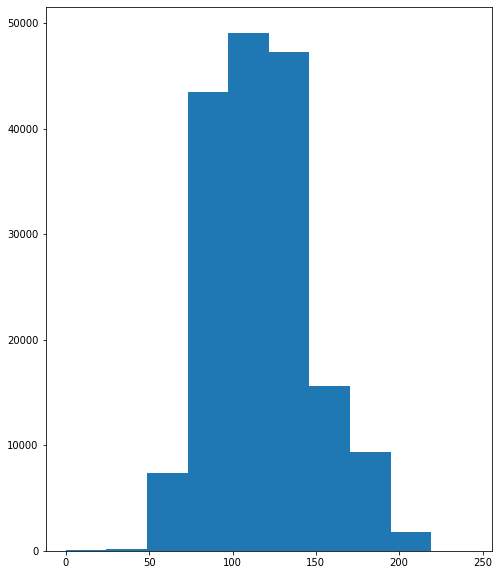

In [71]:
#Tempos
# hist(music$tempo)
# music$tempo_disc <- discretize(music$tempo, method = "cluster", breaks = 5, labels = FALSE)
# music$tempo_disc <- as.factor(music$tempo_disc)
# table(music$temp_disc)

plt.hist(music.tempo)
music["tempo_disc"] = np.digitize(music.tempo, [60, 94, 116, 135])
music["tempo_disc"] = music["tempo_disc"].astype(str)
music.tempo_disc.value_counts()

In [72]:
#Multi Artists
# for (i in 1:nrow(music)) {
#   if (grepl("', '", music$artists[i])) { music$multi_artist[i] <- 1 }
#   else { music$multi_artist[i] <- 0 }
# }
# table(music$multi_artist)

music["multi_artist"] = np.where(("," in music.artists), 1, 0) #I don't know why but this line has to be run before the for loop
for i in range(len(music)):
    if "," in music.artists[i]:
        music.multi_artist[i] = 1
    else:
        music.multi_artist[i] = 0

music.multi_artist = music.multi_artist.astype(str) 
music.multi_artist.value_counts()

0    136808
1     37581
Name: multi_artist, dtype: int64

In [73]:
# Explicit - make factor
# music$explicit <- as.factor(music$explicit)

music.explicit = music.explicit.astype(str)

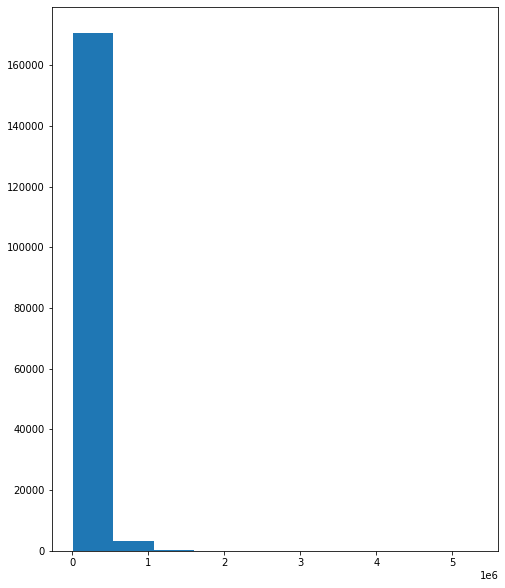

In [74]:
# Duration MS
# hist(music$duration_ms)
# hist(log(music$duration_ms))
# music$log_duration_ms <- log(music$duration_ms)

plt.hist(music.duration_ms)
plt.hist(np.log(music.duration_ms))
music["log_duration_ms"] = np.log(music.duration_ms)

4    44561
3    44086
0    42221
2    27187
1    16334
Name: acousticness_disc, dtype: int64

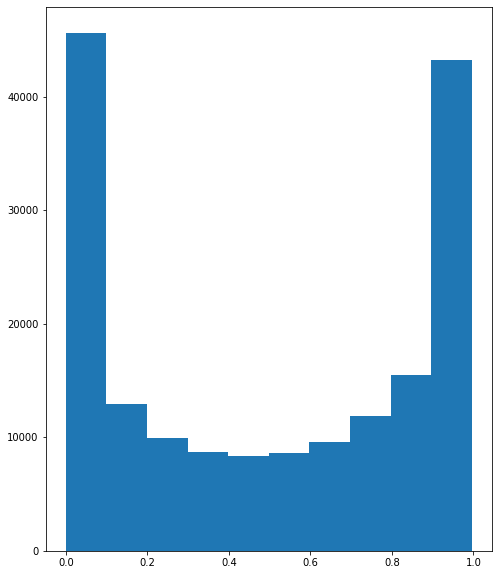

In [75]:
# Acousticness - discretize into 5 bins
# hist(music$acousticness)
# hist(music$acousticness, breaks = 20, main = "K-Means")
# abline(v = discretize(music$acousticness, method = "cluster", breaks = 5, 
#                       onlycuts = TRUE), col = "red")
# music$acousticness_disc <- discretize(music$acousticness, method = "cluster", breaks = 5, labels = FALSE)
# table(music$acousticness_disc)
# music$acousticness_disc <- as.factor(music$acousticness_disc)

plt.hist(music.acousticness)
music.acousticness.describe()
music["acousticness_disc"] = np.digitize(music.acousticness, [0.08, 0.2, 0.5, 0.89])
music.acousticness_disc = music.acousticness_disc.astype(str)
music.acousticness_disc.value_counts()

4    46678
3    39932
0    39740
2    27905
1    20134
Name: danceability_disc, dtype: int64

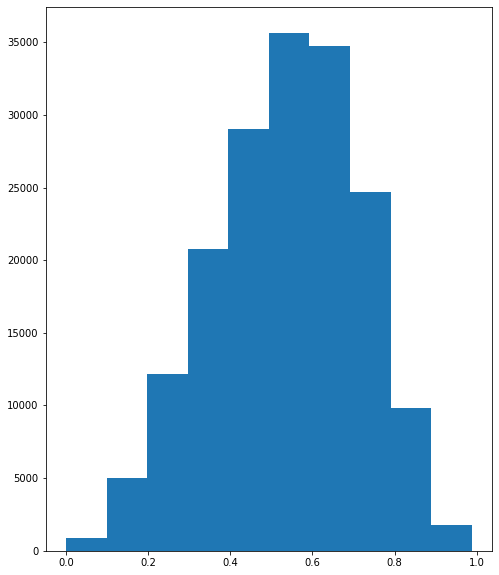

In [76]:
# Danceability - discretize
# hist(music$danceability)
# summary(music$danceability)
# hist(music$danceability, breaks = 20, main = "K-Means")
# abline(v = discretize(music$danceability, method = "cluster", breaks = 5, 
#                       onlycuts = TRUE), col = "red")
# music$danceability_disc <- discretize(music$danceability, method = "cluster", breaks = 5, labels = FALSE)
# music$danceability_disc <- as.factor(music$danceability_disc)

plt.hist(music.danceability)
music.danceability.describe()
music["danceability_disc"] = np.digitize(music.danceability, [0.4, 0.47, 0.55, 0.66])
music.danceability_disc = music.danceability_disc.astype(str)
music.danceability_disc.value_counts()

1    42115
2    37296
3    33079
0    32477
4    29422
Name: energy_disc, dtype: int64

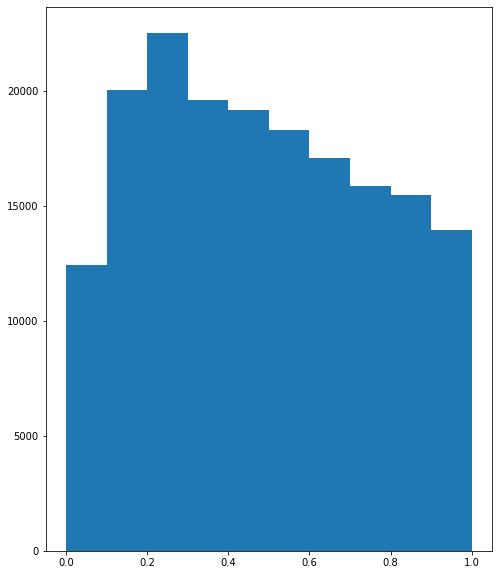

In [77]:
# Energy - transform or discretize
# hist(music$energy)
# library(bestNormalize)
# BNobject <- bestNormalize(music$energy)
# music$energy_trans <- BNobject$x.t
# hist(music$energy_trans)
# hist(music$energy, breaks = 20, main = "K-Means")
# abline(v = discretize(music$energy, method = "cluster", breaks = 5, 
#                       onlycuts = TRUE), col = "red")
# music$energy_disc <- discretize(music$energy, method = "cluster", breaks = 5, labels = FALSE)
# music$energy_disc <- as.factor(music$energy_disc)

plt.hist(music.energy)
music.energy.describe()
music["energy_disc"] = np.digitize(music.energy, [0.2, 0.4, 0.6, 0.8])
music.energy_disc = music.energy_disc.astype(str)
music.energy_disc.value_counts()

0    91786
1    31978
4    24535
2    14290
3    11800
Name: instrumentalness_disc, dtype: int64

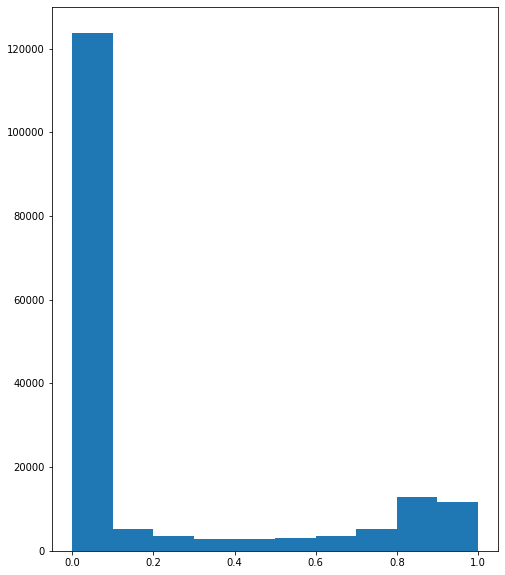

In [78]:
# Instrumentalness - discretize into 5 bins
# hist(music$instrumentalness, breaks = 20, main = "K-Means")
# abline(v = discretize(music$instrumentalness, method = "cluster", breaks = 5, 
#                       onlycuts = TRUE), col = "red")
# music$instrumentalness_disc <- discretize(music$instrumentalness, method = "cluster", breaks = 5, labels = FALSE)
# music$instrumentalness_disc <- as.factor(music$instrumentalness_disc)

plt.hist(music.instrumentalness)
music.instrumentalness.describe()
music["instrumentalness_disc"] = np.digitize(music.instrumentalness, [0.001, 0.1, 0.5, 0.8])
music.instrumentalness_disc = music.instrumentalness_disc.astype(str)
music.instrumentalness_disc.value_counts()

1    71246
2    42656
3    24118
0    22946
4    13423
Name: liveness_disc, dtype: int64

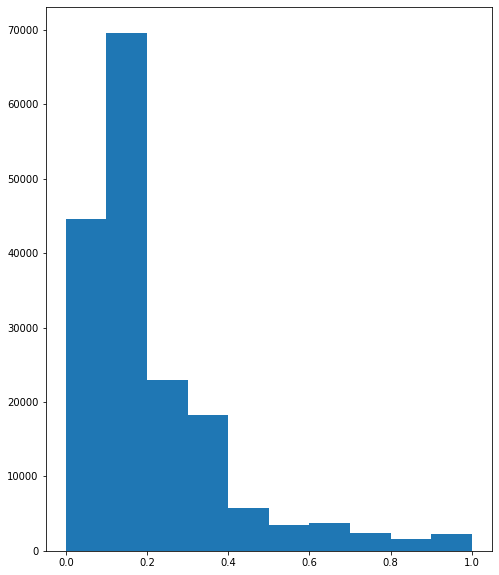

In [79]:
# Key - make factor
# music$key <- as.factor(music$key)

music.key = music.key.astype(str)

# # Liveness - discretize into 5 bins
# hist(music$liveness, breaks = 5)
# table(discretize(music$liveness, method = "cluster", breaks = 5))
# hist(music$liveness, breaks = 20, main = "K-Means")
# abline(v = discretize(music$liveness, method = "cluster", breaks = 5, 
#                       onlycuts = TRUE), col = "red")
# music$liveness_disc <- discretize(music$liveness, method = "cluster", breaks = 5, labels = FALSE)
# music$liveness_disc <- as.factor(music$liveness_disc)

plt.hist(music.liveness)
music.liveness.describe()
music["liveness_disc"] = np.digitize(music.liveness, [0.08, 0.15, 0.3, 0.5])
music.liveness_disc = music.liveness_disc.astype(str)
music.liveness_disc.value_counts()

3    62359
2    54982
1    27174
0    15712
4    14162
Name: loudness_disc, dtype: int64

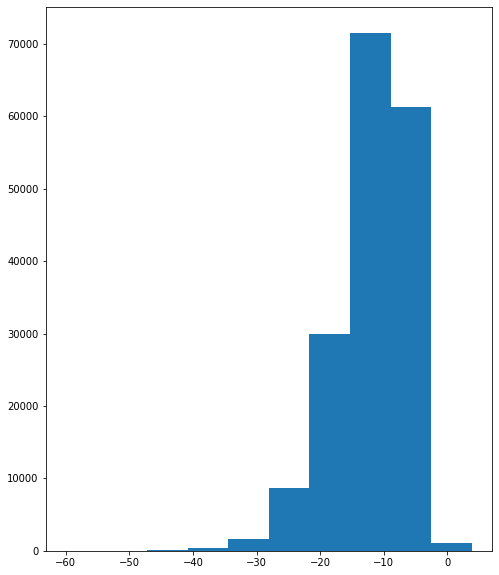

In [80]:
# Loudness - discretize into 5 bins
# hist(music$loudness)
# table(discretize(music$loudness, method = "cluster", breaks = 5))
# hist(music$loudness, breaks = 20, main = "K-Means")
# abline(v = discretize(music$loudness, method = "cluster", breaks = 5, 
#                       onlycuts = TRUE), col = "red")
# music$loudness_disc <- discretize(music$loudness, method = "cluster", breaks = 5, labels = FALSE)
# music$loudness_disc <- as.factor(music$loudness_disc)

plt.hist(music.loudness)
music.loudness.describe()
music["loudness_disc"] = np.digitize(music.loudness, [-20, -15, -10, -5])
music.loudness_disc = music.loudness_disc.astype(str)
music.loudness_disc.value_counts()

4    44458
3    44443
2    43094
1    26266
0    16128
Name: speechiness_disc, dtype: int64

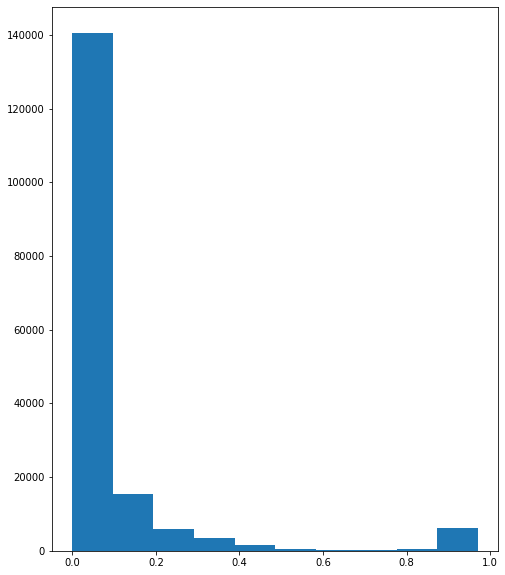

In [81]:
# Speechiness - discretize into 5 bins
# hist(music$speechiness)
# table(discretize(music$speechiness, method = "cluster", breaks = 5))
# hist(music$speechiness, breaks = 20, main = "K-Means")
# abline(v = discretize(music$speechiness, method = "cluster", breaks = 5, 
#                       onlycuts = TRUE), col = "red")
# music$speechiness_disc <- discretize(music$speechiness, method = "cluster", breaks = 5, labels = FALSE)
# music$speechiness_disc <- as.factor(music$speechiness_disc)

plt.hist(music.speechiness)
music.speechiness.describe()
music["speechiness_disc"] = np.digitize(music.speechiness, [0.03, 0.035, 0.045, 0.075])
music.speechiness_disc = music.speechiness_disc.astype(str)
music.speechiness_disc.value_counts()

4    44447
3    44191
2    42316
0    25567
1    17868
Name: valence_disc, dtype: int64

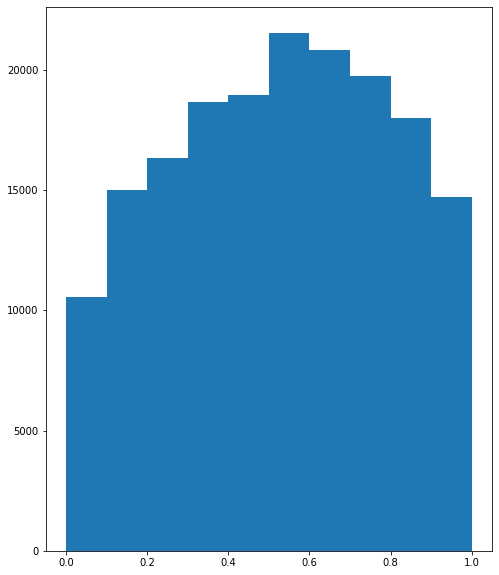

In [82]:
# Valence - discretize into 5 bins
# table(discretize(music$valence, method = "cluster", breaks = 5))
# hist(music$valence, breaks = 20, main = "K-Means")
# abline(v = discretize(music$valence, method = "cluster", breaks = 5, 
#                       onlycuts = TRUE), col = "red")
# music$valence_disc <- discretize(music$valence, method = "cluster", breaks = 5, labels = FALSE)
# music$valence_disc <- as.factor(music$valence_disc)

plt.hist(music.valence)
music.valence.describe()
music["valence_disc"] = np.digitize(music.valence, [0.2, 0.31, 0.53, 0.74])
music.valence_disc = music.valence_disc.astype(str)
music.valence_disc.value_counts()

In [83]:
# Mode - factor
# music$mode <- as.factor(music$mode)

music.mode = music["mode"].astype(str)

0    82401
1    61384
2    28398
3     2206
Name: popularity_disc, dtype: int64

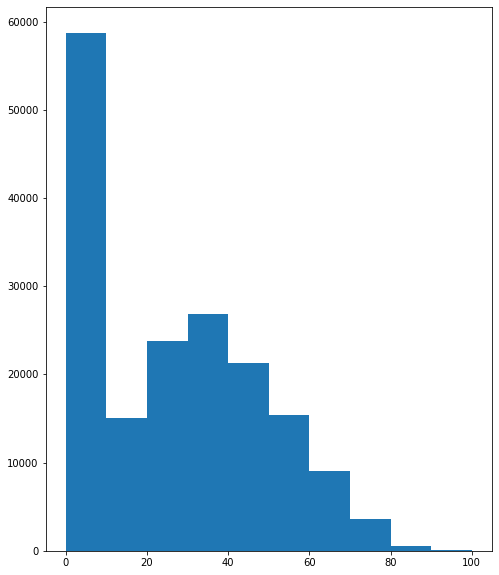

In [84]:
# Popularity - factor w/ 5 levels
# music$popularity_disc <- discretize(music$popularity, method = "interval", breaks = 3, labels = FALSE)
# music$popularity_disc <- as.factor(music$popularity_disc)
# summary(music$popularity)
# table(music$popularity_disc)

plt.hist(music.popularity)
music.popularity.describe()
music["popularity_disc"] = np.digitize(music.popularity, [24, 49, 74])
music.popularity_disc = music.popularity_disc.astype(str)
music.popularity_disc.value_counts()

In [85]:
#Split into 2 datasets: All Numeric, Discretized
# music_raw <- music[which(colnames(music) %in% c("acousticness", "danceability", "duration_ms", "energy", "explicit", "instrumentalness", 
#"key", "liveness", "loudness", "mode", "popularity_disc", "release_date", "speechiness", "tempo", "valence", "year", "multi_artist"))]

# music_disc <- music[which(colnames(music) %in% c("popularity_disc", "decade", "temp_disc", "multi_artist", "log_duration_ms", "danceability_disc", 
#"explicit", "instrumentalness_disc", "key", "liveness_disc", "loudness_disc", "speechiness_disc", "valence_disc", "acousticness_disc", "energy_disc",
#"mode"))]

music_raw = music[["acousticness", "danceability", "duration_ms", "energy", "explicit", "instrumentalness","key", "liveness", "loudness", "mode", 
                   "popularity_disc", "release_date", "speechiness", "tempo", "valence", "year", "multi_artist"]]

music_disc = music[["popularity_disc", "decade", "tempo_disc", "multi_artist", "log_duration_ms", "danceability_disc", "explicit", 
                    "instrumentalness_disc", "key", "liveness_disc", "loudness_disc", "speechiness_disc", "valence_disc", "acousticness_disc", 
                    "energy_disc", "mode"]]

In [86]:
# split into training and holdout
X = music_disc.loc[:, music_disc.columns != 'popularity_disc']
y = music_disc.loc[:, music_disc.columns == 'popularity_disc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [87]:
#Naive Model
y_test['popularity_disc'].value_counts()
24628/(len(y_test))*100  #47.07456467305082 accuracy

47.07456467305082

In [89]:
# create tuning parameter grid function
def expand_grid(dictionary):
   return pd.DataFrame([i for i in product(*dictionary.values())], 
                       columns=dictionary.keys())

In [29]:
# DECISION TREE
# Create tuning grid for Decision Tree
dictionary = {'criterion': ['entropy','gini'],
             'splitter': ['random','best'],
             'max_depth': [8,10,25]}

grid = expand_grid(dictionary)


# CREATE MODEL
accuracies = []
for i in grid.index:
    dt = DecisionTreeClassifier(criterion = grid.iloc[i,0]  , splitter = grid.iloc[i,1], max_depth = grid.iloc[i,2])

    dt = dt.fit(X_train,y_train)

    accuracies.append(dt.score(X_test,y_test))

    
# CHECK ACCURACIES AND WHICH MODEL IS BEST
dt_accuracies = pd.DataFrame(accuracies)
dt_accuracies = dt_accuracies.rename(columns={0: "accuracy"})
dt_accuracies['criterion'] = grid.iloc[:,0]
dt_accuracies['splitter'] = grid.iloc[:,1]
dt_accuracies['max_depth'] = grid.iloc[:,2]
dt_accuracies

best_dt_model = dt_accuracies.iloc[dt_accuracies['accuracy'].idxmax()]
best_dt_model
# 0.761664 accuracy

accuracy     0.761454
criterion        gini
splitter         best
max_depth          10
Name: 10, dtype: object

In [33]:
## Feature Importance values and plots for DT model
importances_dt = pd.DataFrame({'feature': X.columns,
                            'importance': dt.feature_importances_})
importances_dt = importances_dt.sort_values('importance', ascending=False)
importances_dt['cum_importance'] = importances_dt.importance.cumsum()
importances_dt.loc[importances_dt.cum_importance <= .80]

,feature,importance,cum_importance
0,decade,0.454421,0.454421
3,log_duration_ms,0.162238,0.616658
7,key,0.057731,0.674389
6,instrumentalness_disc,0.050898,0.725286
8,liveness_disc,0.035073,0.760360
1,tempo_disc,0.032728,0.793088


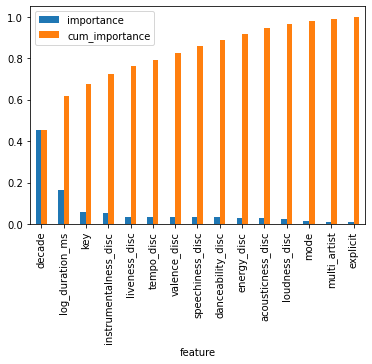

In [34]:
imp_dt = importances_dt.set_index('feature')
imp_dt.plot(kind='bar');

In [98]:
# RANDOM FOREST
# CREATE MODEL

rf = RandomForestRegressor(n_estimators = 2000, random_state = 42, max_features = 'sqrt', bootstrap = True)

rf = rf.fit(X_train,y_train.values.ravel())
    
accuracy = rf.score(X_test,y_test)

best_rf_model = accuracy
best_rf_model
# 0.5487814522196701 accuracy

0.5487814522196701

In [36]:
## Feature Importance values and plots for RF model
importances_rf = pd.DataFrame({'feature': X.columns,
                            'importance': rf.feature_importances_})
importances_rf = importances_rf.sort_values('importance', ascending=False)
importances_rf['cum_importance'] = importances_rf.importance.cumsum()
importances_rf.loc[importances_rf.cum_importance <= .80]

,feature,importance,cum_importance
0,decade,0.291001,0.291001
3,log_duration_ms,0.148391,0.439392
12,acousticness_disc,0.076291,0.515684
7,key,0.068363,0.584046
6,instrumentalness_disc,0.061948,0.645994
13,energy_disc,0.055455,0.701449
9,loudness_disc,0.046903,0.748352
10,speechiness_disc,0.043637,0.791989


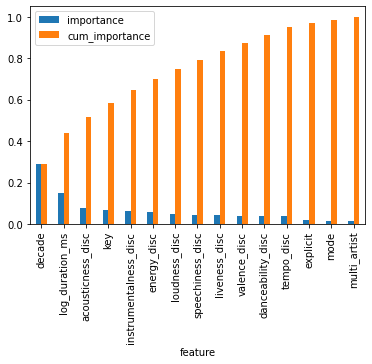

In [37]:
imp_rf = importances_rf.set_index('feature')
imp_rf.plot(kind='bar');

## KNN Model

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBClassifier
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor

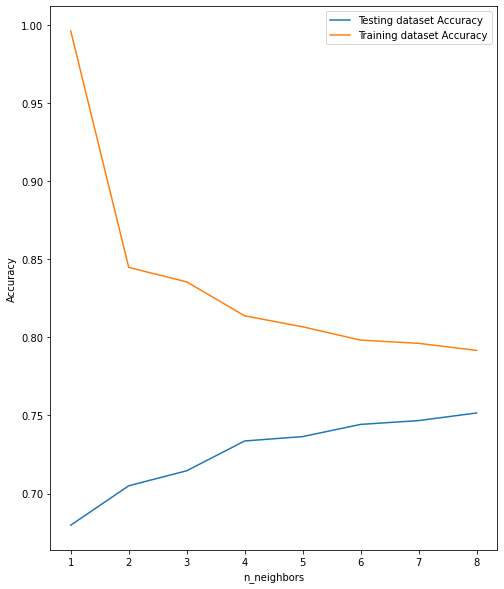

In [91]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=5)
    knn.fit(X_train, y_train)
    
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
    
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [92]:
train_accuracy

array([0.99615801, 0.84478013, 0.8355233 , 0.81376565, 0.80676158,
       0.79823383, 0.79616128, 0.79164755])

In [93]:
test_accuracy

array([0.6797217 , 0.7049525 , 0.71456697, 0.73364298, 0.73645278,
       0.74425139, 0.74669801, 0.75157215])

In [94]:
knn= KNeighborsClassifier(n_neighbors=7, n_jobs=5)
knn.fit(X_train,y_train)
y_pred= knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.7466980140298565

In [ ]:
# Feature importance is not defined for the KNN Classification algorithm. There is no easy way to compute the features
#responsible for a classification here

In [54]:
#Using Lasso Model to further investigate feature importance 
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
reg = LassoCV()
reg.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.010124
Best score using built-in LassoCV: 0.312563


In [57]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 13 variables and eliminated the other 2 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

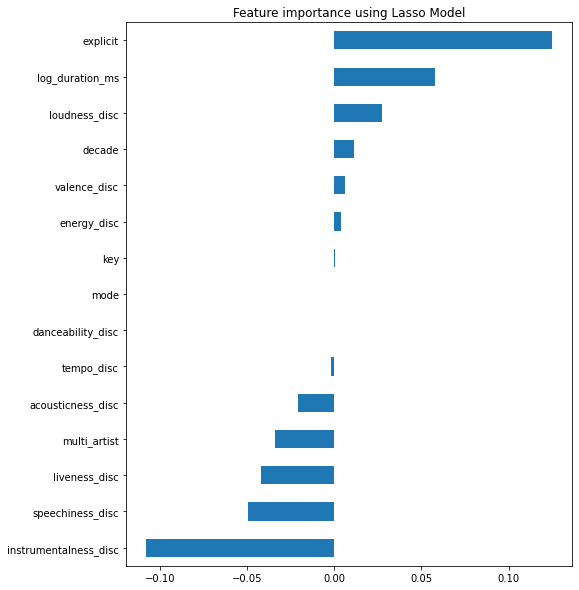

In [59]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

## XGBOOST Model 

In [37]:
pip install xgboost

     |████████████████████████████████| 1.3 MB 2.2 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [30]:
print(X_test.dtypes)

decade                     int64
tempo_disc                object
multi_artist              object
log_duration_ms          float64
danceability_disc         object
explicit                  object
instrumentalness_disc     object
key                       object
liveness_disc             object
loudness_disc             object
speechiness_disc          object
valence_disc              object
acousticness_disc         object
energy_disc               object
mode                       int64
dtype: object


In [31]:
print(y_train.dtypes)

popularity_disc    object
dtype: object


In [32]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
X_test['tempo_disc'] = lbl.fit_transform(X_test['tempo_disc'].astype(str))
X_test['multi_artist'] = lbl.fit_transform(X_test['multi_artist'].astype(str))
X_test['danceability_disc'] = lbl.fit_transform(X_test['danceability_disc'].astype(str))
X_test['explicit'] = lbl.fit_transform(X_test['explicit'].astype(str))
X_test['instrumentalness_disc'] = lbl.fit_transform(X_test['instrumentalness_disc'].astype(str))
X_test['key'] = lbl.fit_transform(X_test['key'].astype(str))
X_test['liveness_disc'] = lbl.fit_transform(X_test['liveness_disc'].astype(str))
X_test['loudness_disc'] = lbl.fit_transform(X_test['loudness_disc'].astype(str))
X_test['speechiness_disc'] = lbl.fit_transform(X_test['speechiness_disc'].astype(str))
X_test['valence_disc'] = lbl.fit_transform(X_test['valence_disc'].astype(str))
X_test['acousticness_disc'] = lbl.fit_transform(X_test['acousticness_disc'].astype(str))
X_test['energy_disc'] = lbl.fit_transform(X_test['energy_disc'].astype(str))

In [33]:
print(X_test.dtypes)

decade                     int64
tempo_disc                 int64
multi_artist               int64
log_duration_ms          float64
danceability_disc          int64
explicit                   int64
instrumentalness_disc      int64
key                        int64
liveness_disc              int64
loudness_disc              int64
speechiness_disc           int64
valence_disc               int64
acousticness_disc          int64
energy_disc                int64
mode                       int64
dtype: object


In [48]:
# import xgboost as xgb
# model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
# model.fit(X_train, y_train)
# model.score(X_test,y_test)

In [34]:
print(X_train.dtypes)

decade                     int64
tempo_disc                object
multi_artist              object
log_duration_ms          float64
danceability_disc         object
explicit                  object
instrumentalness_disc     object
key                       object
liveness_disc             object
loudness_disc             object
speechiness_disc          object
valence_disc              object
acousticness_disc         object
energy_disc               object
mode                       int64
dtype: object


In [35]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
X_train['tempo_disc'] = lbl.fit_transform(X_train['tempo_disc'].astype(str))
X_train['multi_artist'] = lbl.fit_transform(X_train['multi_artist'].astype(str))
X_train['danceability_disc'] = lbl.fit_transform(X_train['danceability_disc'].astype(str))
X_train['explicit'] = lbl.fit_transform(X_train['explicit'].astype(str))
X_train['instrumentalness_disc'] = lbl.fit_transform(X_train['instrumentalness_disc'].astype(str))
X_train['key'] = lbl.fit_transform(X_train['key'].astype(str))
X_train['liveness_disc'] = lbl.fit_transform(X_train['liveness_disc'].astype(str))
X_train['loudness_disc'] = lbl.fit_transform(X_train['loudness_disc'].astype(str))
X_train['speechiness_disc'] = lbl.fit_transform(X_train['speechiness_disc'].astype(str))
X_train['valence_disc'] = lbl.fit_transform(X_train['valence_disc'].astype(str))
X_train['acousticness_disc'] = lbl.fit_transform(X_train['acousticness_disc'].astype(str))
X_train['energy_disc'] = lbl.fit_transform(X_train['energy_disc'].astype(str))

In [36]:
print(X_train.dtypes)

decade                     int64
tempo_disc                 int64
multi_artist               int64
log_duration_ms          float64
danceability_disc          int64
explicit                   int64
instrumentalness_disc      int64
key                        int64
liveness_disc              int64
loudness_disc              int64
speechiness_disc           int64
valence_disc               int64
acousticness_disc          int64
energy_disc                int64
mode                       int64
dtype: object


In [37]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train, y_train)

[20:27:11] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [38]:
y_pred_xg= model.predict(X_test)
metrics.accuracy_score(y_test,y_pred_xg)

0.7604411567941587

In [44]:
# feature importance of XGBOOST MOdel 
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

In [45]:
importances

,Attribute,Importance
0,decade,0.829424
6,instrumentalness_disc,0.065661
5,explicit,0.032620
12,acousticness_disc,0.014279
9,loudness_disc,0.008825
8,liveness_disc,0.008751
3,log_duration_ms,0.007997
1,tempo_disc,0.006648
4,danceability_disc,0.005317
13,energy_disc,0.005285


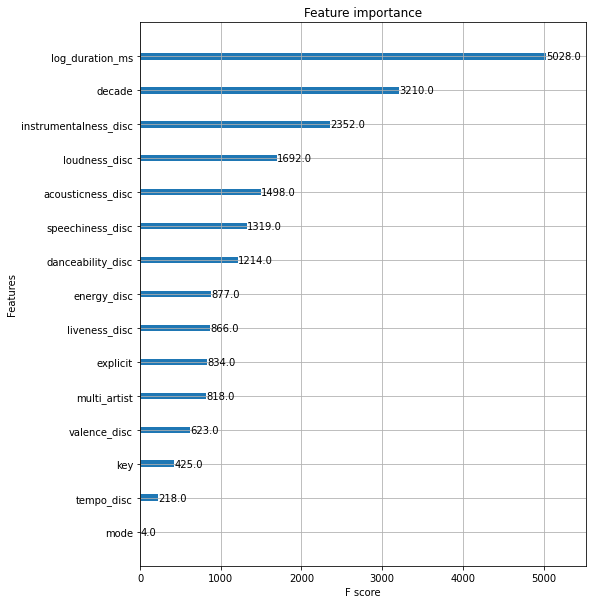

In [97]:
# plot feature importance xgboost 
from xgboost import plot_importance
plot_importance(model)
plt.show()

In [ ]:
# Support Vector Machine

In [ ]:
from sklearn.model_selection import train_test_split

# split into training and holdout
X = music_disc.loc[:, music_disc.columns != 'popularity_disc']
y = music_disc.loc[:, music_disc.columns == 'popularity_disc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
from sklearn.svm import SVC

In [ ]:
modelSVC = SVC()

In [ ]:
# Train the Model

# X_train, X_test, y_train, y_test

modelSVC.fit(X_train, y_train)

In [ ]:
#Make predictions with the model

predictions = modelSVC.predict(X_test)

In [ ]:
#Measure the performance of our model

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
print(classification_report(y_test, predictions))

In [ ]:
# precision    recall  f1-score   support
#
#           0       0.68      0.95      0.79     24628
#           1       0.75      0.74      0.74     18398
#           2       0.00      0.00      0.00      8609
#           3       0.00      0.00      0.00       682

#    accuracy                           0.70     52317
#   macro avg       0.36      0.42      0.38     52317
#weighted avg       0.58      0.70      0.63     52317

In [ ]:
print(confusion_matrix(y_test, predictions))

In [ ]:
#[[23294  1334     0     0]
# [ 4809 13589     0     0]
# [ 5380  3229     0     0]
# [  614    68     0     0]]

In [ ]:
from sklearn import metrics

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

In [ ]:
# XG CatBoost

In [ ]:
# Build Model

from catboost import CatBoostClassifier
XGcat = CatBoostClassifier(n_estimators=100)

In [ ]:
XGcat.fit(X_train, y_train)

In [ ]:
# X_train, X_test, y_train, y_test
print(classification_report(y_test,XGcat.predict(X_test)))

#                precision    recall  f1-score   support
#
#           0       0.86      0.86      0.86     24628
#           1       0.71      0.81      0.76     18398
#           2       0.62      0.47      0.53      8609
#           3       0.42      0.09      0.15       682

#    accuracy                           0.77     52317
#   macro avg       0.65      0.56      0.57     52317
#weighted avg       0.76      0.77      0.76     52317

In [ ]:
# get importance
importance = XGcat.feature_importances_

In [ ]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

In [ ]:
from matplotlib import pyplot

In [ ]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()